<h1>Import Libraries

In [1]:
import torch
import numpy as np
from torch.utils.data import Dataset, DataLoader
import pandas as pd
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder, OneHotEncoder
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats


<h1> Loading Data and Exploration

In [2]:
train_df = pd.read_csv('Dataset Compbio\Train.csv')
test_df = pd.read_csv('Dataset Compbio\Test.csv')

#systolic and diastolic splitting
for df in [train_df, test_df]:
    df[['Systolic', 'Diastolic']] = df['Blood Pressure (s/d)'].str.split('/', expand=True).astype(float)
    df.drop('Blood Pressure (s/d)', axis=1, inplace=True)

print('Train: \n',train_df.dtypes)
print('Test: \n',test_df.dtypes)


Train: 
 Gender                          object
Height (cm)                    float64
Weight (kg)                    float64
Cholesterol Level (mg/dL)      float64
BMI                            float64
Blood Glucose Level (mg/dL)    float64
Bone Density (g/cm²)           float64
Vision Sharpness               float64
Hearing Ability (dB)           float64
Physical Activity Level         object
Smoking Status                  object
Alcohol Consumption             object
Diet                            object
Chronic Diseases                object
Medication Use                  object
Family History                  object
Cognitive Function             float64
Mental Health Status            object
Sleep Patterns                  object
Stress Levels                  float64
Pollution Exposure             float64
Sun Exposure                   float64
Education Level                 object
Income Level                    object
Age (years)                      int64
Systolic        

In [3]:
# Daftar atribut yang akan dicari unique value
attributes = ['Gender', 'Physical Activity Level', 'Smoking Status', 
              'Alcohol Consumption', 'Diet', 'Chronic Diseases', 
              'Medication Use', 'Family History', 'Mental Health Status', 
              'Sleep Patterns','Education Level', 'Income Level']

# Menampilkan unique values untuk setiap atribut
for attribute in attributes:
    if attribute in df.columns:
        print(f"Unique values for '{attribute}':", df[attribute].unique())
    else:
        print(f"Column '{attribute}' not found in dataset.")
    
# Statistik deskriptif untuk data numerik
print("\nDescriptive Statistics (Train):")
print(train_df.describe())

print("\nDescriptive Statistics (Test):")
print(test_df.describe())


Unique values for 'Gender': ['Male' 'Female']
Unique values for 'Physical Activity Level': ['Moderate' 'Low' 'High']
Unique values for 'Smoking Status': ['Former' 'Current' 'Never']
Unique values for 'Alcohol Consumption': [nan 'Occasional' 'Frequent']
Unique values for 'Diet': ['Low-carb' 'Balanced' 'Vegetarian' 'High-fat']
Unique values for 'Chronic Diseases': [nan 'Hypertension' 'Diabetes' 'Heart Disease']
Unique values for 'Medication Use': [nan 'Regular' 'Occasional']
Unique values for 'Family History': [nan 'Heart Disease' 'Hypertension' 'Diabetes']
Unique values for 'Mental Health Status': ['Good' 'Poor' 'Fair' 'Excellent']
Unique values for 'Sleep Patterns': ['Insomnia' 'Normal' 'Excessive']
Unique values for 'Education Level': [nan 'Undergraduate' 'High School' 'Postgraduate']
Unique values for 'Income Level': ['Medium' 'Low' 'High']

Descriptive Statistics (Train):
       Height (cm)  Weight (kg)  Cholesterol Level (mg/dL)          BMI  \
count  3000.000000  3000.000000      

In [4]:
# Mendeteksi potensi outlier menggunakan IQR
for df_name, df in zip(['Train', 'Test'], [train_df, test_df]):
    print(f"\nOutlier Detection in {df_name} Dataset:")
    for column in df.select_dtypes(include='float64').columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        outliers = df[(df[column] < (Q1 - 1.5 * IQR)) | (df[column] > (Q3 + 1.5 * IQR))]
        print(f"{column}: {len(outliers)} potential outliers")
        if not outliers.empty:
            print(outliers[[column]].head(20))  # Menampilkan 10 outlier pertama di setiap kolom




Outlier Detection in Train Dataset:
Height (cm): 1 potential outliers
      Height (cm)
2321   198.112215
Weight (kg): 7 potential outliers
      Weight (kg)
552    115.342955
847    110.547502
1313   112.837337
1744   120.883599
1983    32.537672
2498   123.598603
2599   109.768180
Cholesterol Level (mg/dL): 19 potential outliers
      Cholesterol Level (mg/dL)
199                  303.124656
389                  165.201902
422                  301.751496
521                  162.791040
621                  164.078306
850                  331.300589
874                  307.544519
1098                 312.360851
1238                 148.811514
1424                 164.109698
1488                 304.631578
1883                 301.565599
2035                 164.720655
2334                 313.102934
2456                 164.942246
2543                 164.537785
2711                 307.459757
2878                 307.920410
2970                 302.916227
BMI: 16 potential outliers

In [5]:
# Mendeteksi data yang kosong (missing values)
print("\nMissing Values in Train Dataset:")
print(train_df.isnull().sum())

print("\nMissing Values in Test Dataset:")
print(test_df.isnull().sum())



Missing Values in Train Dataset:
Gender                            0
Height (cm)                       0
Weight (kg)                       0
Cholesterol Level (mg/dL)         0
BMI                               0
Blood Glucose Level (mg/dL)       0
Bone Density (g/cm²)              0
Vision Sharpness                  0
Hearing Ability (dB)              0
Physical Activity Level           0
Smoking Status                    0
Alcohol Consumption            1201
Diet                              0
Chronic Diseases               1299
Medication Use                 1198
Family History                 1451
Cognitive Function                0
Mental Health Status              0
Sleep Patterns                    0
Stress Levels                     0
Pollution Exposure                0
Sun Exposure                      0
Education Level                 627
Income Level                      0
Age (years)                       0
Systolic                          0
Diastolic                     

In [6]:
# Menjadikan kolom 'Age' sebagai label
y_train = train_df['Age (years)']
X_train = train_df.drop('Age (years)', axis=1)


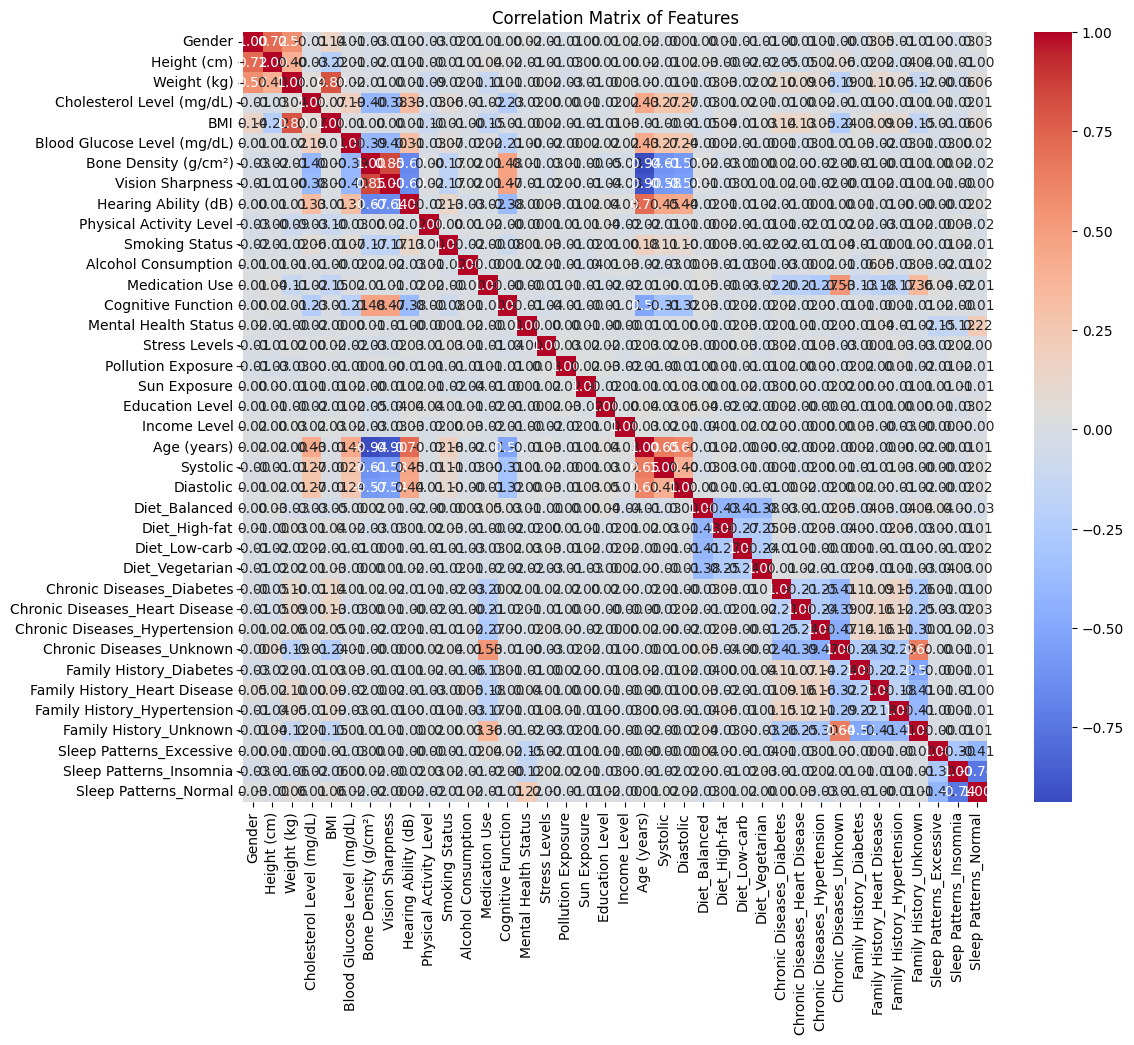

In [18]:
# Menghitung matriks korelasi
correlation_matrix = train_df.corr(numeric_only=True)

# Menampilkan peta panas (heatmap) dari korelasi
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Features')
plt.show()


In [10]:
# Menghitung korelasi antara fitur dan label (Age)
label_correlation = train_df.corr(numeric_only=True)['Age (years)'].drop('Age (years)')

print("\nKorelasi antara fitur dan label (Age):")
print(label_correlation.sort_values(ascending=False))



Korelasi antara fitur dan label (Age):
Hearing Ability (dB)           0.712374
Systolic                       0.646056
Diastolic                      0.611071
Cholesterol Level (mg/dL)      0.432368
Blood Glucose Level (mg/dL)    0.428573
Stress Levels                  0.029093
Height (cm)                    0.020322
Sun Exposure                   0.009245
Weight (kg)                    0.002521
BMI                           -0.008042
Pollution Exposure            -0.010464
Cognitive Function            -0.508058
Vision Sharpness              -0.899692
Bone Density (g/cm²)          -0.937712
Name: Age (years), dtype: float64


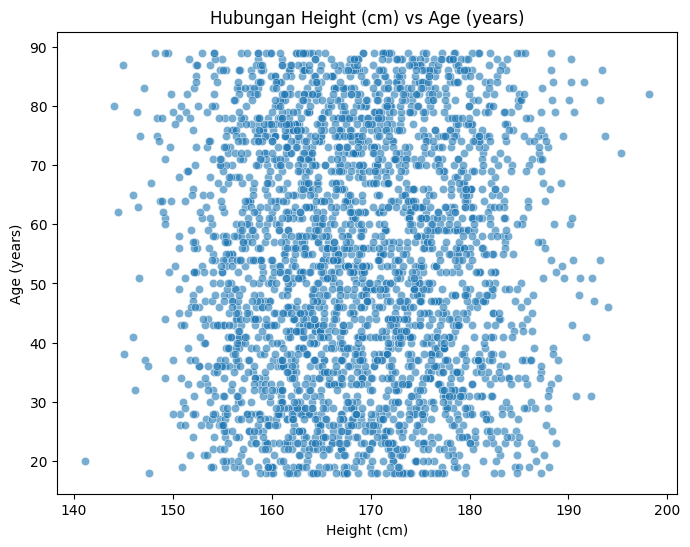

Korelasi Spearman antara Height (cm) dan Age: 0.0208


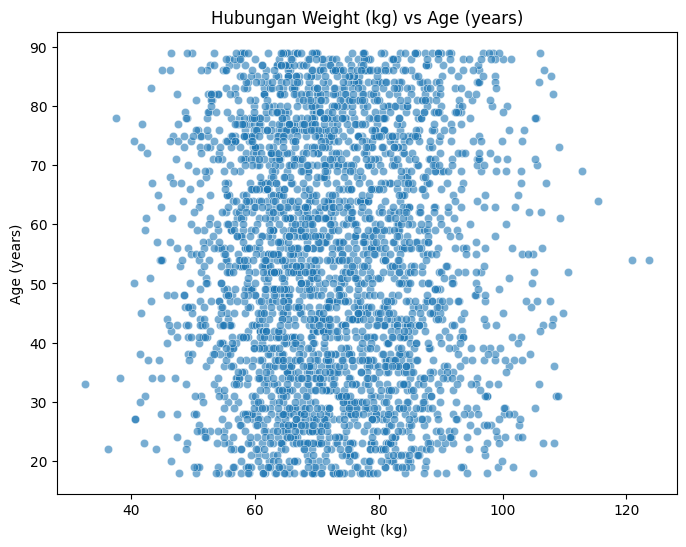

Korelasi Spearman antara Weight (kg) dan Age: 0.0001


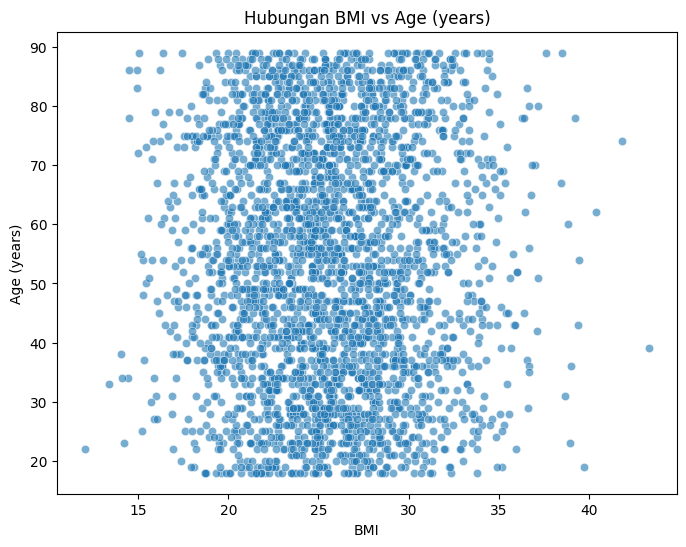

Korelasi Spearman antara BMI dan Age: -0.0129


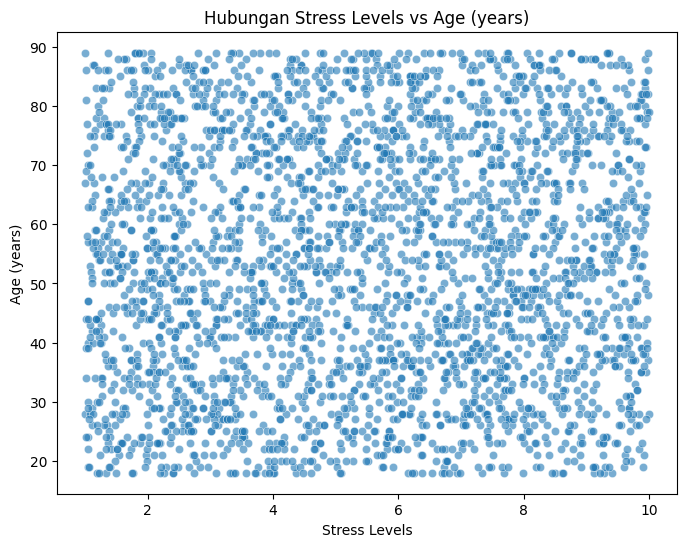

Korelasi Spearman antara Stress Levels dan Age: 0.0292


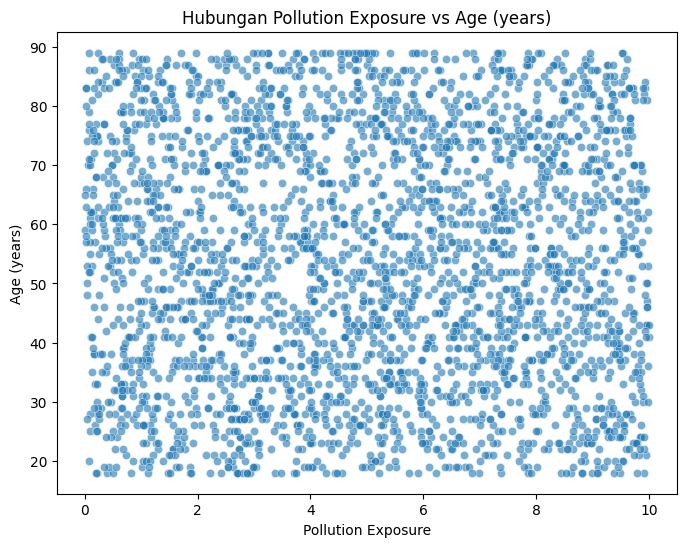

Korelasi Spearman antara Pollution Exposure dan Age: -0.0107


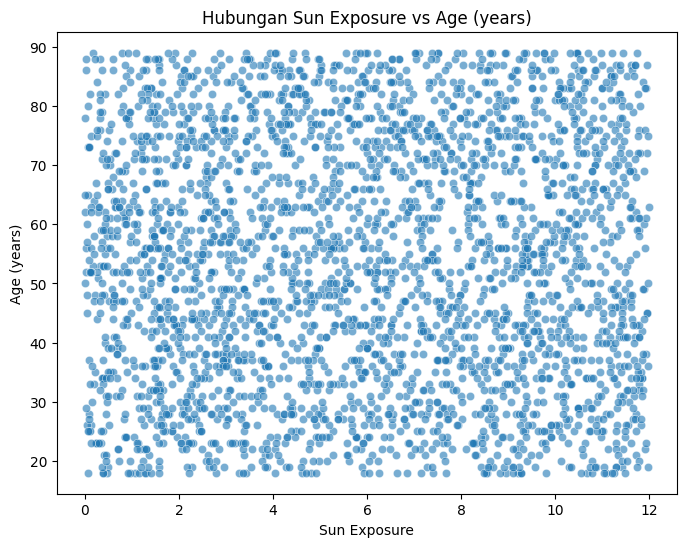

Korelasi Spearman antara Sun Exposure dan Age: 0.0084


In [12]:
# Memeriksa hubungan non-linear untuk fitur dengan korelasi kecil (|r| < 0.1)
low_corr_features = label_correlation[abs(label_correlation) < 0.1].index

for feature in low_corr_features:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=train_df[feature], y=train_df['Age (years)'], alpha=0.6)
    plt.title(f'Hubungan {feature} vs Age (years)')
    plt.show()

    spearman_corr = train_df[[feature, 'Age (years)']].corr(method='spearman').iloc[0, 1]
    print(f"Korelasi Spearman antara {feature} dan Age: {spearman_corr:.4f}")


In [32]:
# 1. Identifikasi kolom
categorical_cols = train_df.select_dtypes(include='object').columns.tolist()

# 2. Isi nilai yang hilang di kolom kategorikal
train_df[categorical_cols] = train_df[categorical_cols].fillna('Unknown')
test_df[categorical_cols] = test_df[categorical_cols].fillna('Unknown')

# 3. Enkoding

# a) Label Encoding untuk kolom biner (Gender)
label_encoders = {}
binary_cols = ['Gender']

for col in binary_cols:
    if col in categorical_cols:
        le = LabelEncoder()
        train_df[col] = le.fit_transform(train_df[col])
        test_df[col] = np.where(test_df[col].isin(le.classes_), le.transform(test_df[col]), -1)
        label_encoders[col] = le

# b) Ordinal Encoding untuk kolom dengan urutan tertentu
ordinal_mappings = {
    'Physical Activity Level': ['Low', 'Moderate', 'High', 'Unknown'],
    'Smoking Status': ['Never', 'Former', 'Current', 'Unknown'],
    'Alcohol Consumption': ['None', 'Occasional', 'Frequent', 'Unknown'],
    'Medication Use': ['None', 'Occasional', 'Regular', 'Unknown'],
    'Mental Health Status': ['Poor', 'Fair', 'Good', 'Excellent', 'Unknown'],
    'Education Level': ['None', 'High School', 'Undergraduate', 'Postgraduate', 'Unknown'],
    'Income Level': ['Low', 'Medium', 'High', 'Unknown']
}

ordinal_encoders = {}
for col, categories in ordinal_mappings.items():
    if col in categorical_cols:
        oe = OrdinalEncoder(categories=[categories], handle_unknown='use_encoded_value', unknown_value=len(categories))
        train_df[col] = oe.fit_transform(train_df[[col]])
        test_df[col] = oe.transform(test_df[[col]])
        ordinal_encoders[col] = oe

# c) One-Hot Encoding untuk kolom lain tanpa urutan
onehot_cols = ['Diet', 'Chronic Diseases', 'Family History', 'Sleep Patterns']
onehot_cols = [col for col in onehot_cols if col in categorical_cols]

train_df = pd.get_dummies(train_df, columns=onehot_cols)
test_df = pd.get_dummies(test_df, columns=onehot_cols)

# 4. Pastikan test_df memiliki kolom yang sama dengan train_df (kecuali Age (years))
missing_cols = set(train_df.columns) - set(test_df.columns) - {'Age (years)'}
for col in missing_cols:
    test_df[col] = 0

# Urutkan kolom agar sesuai
test_df = test_df[train_df.drop('Age (years)', axis=1).columns]

# Cek hasil
print("Shape train_df:", train_df.shape)
print("Shape test_df:", test_df.shape)

# Menampilkan semua kolom di output
pd.set_option('display.max_columns', None)
pd.set_option('display.expand_frame_repr', False)

# Cek hasil
print(train_df.head(1))


Shape train_df: (3000, 38)
Shape test_df: (3000, 37)
   Gender  Height (cm)  Weight (kg)  Cholesterol Level (mg/dL)        BMI  Blood Glucose Level (mg/dL)  Bone Density (g/cm²)  Vision Sharpness  Hearing Ability (dB)  Physical Activity Level  Smoking Status  Alcohol Consumption  Medication Use  Cognitive Function  Mental Health Status  Stress Levels  Pollution Exposure  Sun Exposure  Education Level  Income Level  Age (years)  Systolic  Diastolic  Diet_Balanced  Diet_High-fat  Diet_Low-carb  Diet_Vegetarian  Chronic Diseases_Diabetes  Chronic Diseases_Heart Disease  Chronic Diseases_Hypertension  Chronic Diseases_Unknown  Family History_Diabetes  Family History_Heart Disease  Family History_Hypertension  Family History_Unknown  Sleep Patterns_Excessive  Sleep Patterns_Insomnia  Sleep Patterns_Normal
0       1   171.148359    86.185197                 259.465814  29.423017                   157.652848              0.132868               0.2             58.786198                      1.

In [33]:
# Kolom spesifik untuk korelasi
target_columns = [
    'Physical Activity Level', 'Smoking Status', 'Alcohol Consumption', 'Medication Use',
    'Mental Health Status', 'Education Level', 'Income Level', 'Systolic', 'Diastolic',
    'Diet_Balanced', 'Diet_High-fat', 'Diet_Low-carb', 'Diet_Vegetarian',
    'Chronic Diseases_Diabetes', 'Chronic Diseases_Heart Disease', 'Chronic Diseases_Hypertension', 'Chronic Diseases_Unknown',
    'Family History_Diabetes', 'Family History_Heart Disease', 'Family History_Hypertension', 'Family History_Unknown',
    'Sleep Patterns_Excessive', 'Sleep Patterns_Insomnia', 'Sleep Patterns_Normal'
]

# Menghitung korelasi hanya untuk kolom yang diminta
correlation_matrix = train_df[target_columns + ['Age (years)']].corr(numeric_only=True)['Age (years)'].drop('Age (years)')

print("\nKorelasi antara fitur yang diminta dan label (Age (years)):")
print(correlation_matrix.sort_values(ascending=False))



Korelasi antara fitur yang diminta dan label (Age (years)):
Systolic                          0.646056
Diastolic                         0.611071
Smoking Status                    0.176622
Education Level                   0.042892
Income Level                      0.025946
Diet_High-fat                     0.019952
Chronic Diseases_Hypertension     0.019928
Family History_Diabetes           0.018414
Sleep Patterns_Normal             0.009994
Family History_Hypertension       0.003717
Diet_Vegetarian                   0.000372
Sleep Patterns_Excessive         -0.000550
Family History_Heart Disease     -0.000770
Chronic Diseases_Heart Disease   -0.001419
Chronic Diseases_Unknown         -0.001730
Diet_Low-carb                    -0.003023
Mental Health Status             -0.005899
Sleep Patterns_Insomnia          -0.010066
Medication Use                   -0.010333
Diet_Balanced                    -0.014743
Physical Activity Level          -0.015207
Family History_Unknown           -0.

In [34]:
#Transformation to pytorch dataset

class AgePredictionDataset(Dataset):
    def __init__(self, dataframe, is_train=True):
        self.is_train = is_train
        if self.is_train:
            self.features = dataframe.drop(columns=['Age (years)']).values.astype('float32')
            self.labels = dataframe['Age (years)'].values.astype('float32')
        else:
            self.features = dataframe.values.astype('float32')
        
    def __len__(self):
        return len(self.features)

    def __getitem__(self, idx):
        x = torch.tensor(self.features[idx])
        if self.is_train:
            y = torch.tensor(self.labels[idx])
            return x, y
        return x
    
train_dataset = AgePredictionDataset(train_df, is_train=True)
test_dataset = AgePredictionDataset(test_df, is_train=False)

print(f"Panjang train_dataset: {len(train_dataset)}")
print(f"Panjang test_dataset: {len(test_dataset)}")

print(f"Panjang train_df: {len(train_df)}")
print(f"Panjang test_df: {len(test_df)}")


Panjang train_dataset: 3000
Panjang test_dataset: 3000
Panjang train_df: 3000
Panjang test_df: 3000


<h1>Training

In [16]:
batch_size = 32

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

In [37]:
# TabNet Model
from pytorch_tabnet.tab_model import TabNetRegressor


def get_tabnet():
    return TabNetRegressor()


# DeepSurv Model
import torch.nn as nn


def get_deepsurv(input_dim):
    class DeepSurv(nn.Module):
        def __init__(self, input_dim):
            super(DeepSurv, self).__init__()
            self.model = nn.Sequential(
                nn.Linear(input_dim, 128),
                nn.ReLU(),
                nn.Linear(128, 64),
                nn.ReLU(),
                nn.Linear(64, 1)
            )

        def forward(self, x):
            return self.model(x)

    return DeepSurv(input_dim)


# DeepAge Model
def get_deepage(input_dim):
    class DeepAge(nn.Module):
        def __init__(self, input_dim):
            super(DeepAge, self).__init__()
            self.model = nn.Sequential(
                nn.Linear(input_dim, 256),
                nn.ReLU(),
                nn.Linear(256, 128),
                nn.ReLU(),
                nn.Linear(128, 1)
            )

        def forward(self, x):
            return self.model(x)

    return DeepAge(input_dim)


# Model Selector
def get_model(model_name, input_dim):
    if model_name == 'tabnet':
        return get_tabnet()
    elif model_name == 'deepsurv':
        return get_deepsurv(input_dim)
    elif model_name == 'deepage':
        return get_deepage(input_dim)
    else:
        raise ValueError("Model not recognized. Choose from ['tabnet', 'deepsurv', 'deepage']")


# Training Function
import torch
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

def train(model, train_loader, val_loader, device, epochs=10):
    model.to(device)
    optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
    criterion = nn.MSELoss()

    train_losses = []
    val_losses = []

    for epoch in range(epochs):
        model.train()
        running_loss = 0.0

        for X, y in train_loader:
            X, y = X.to(device), y.to(device)

            optimizer.zero_grad()
            outputs = model(X).squeeze()
            loss = criterion(outputs, y)
            loss.backward()
            optimizer.step()

            running_loss += loss.item()

        avg_train_loss = running_loss / len(train_loader)
        train_losses.append(avg_train_loss)

        # Validation
        model.eval()
        val_loss = 0.0
        all_preds = []
        all_labels = []

        with torch.no_grad():
            for X, y in val_loader:
                X, y = X.to(device), y.to(device)
                outputs = model(X).squeeze()
                loss = criterion(outputs, y)
                val_loss += loss.item()

                all_preds.extend(outputs.cpu().numpy())
                all_labels.extend(y.cpu().numpy())

        avg_val_loss = val_loss / len(val_loader)
        val_losses.append(avg_val_loss)

        print(f"Epoch {epoch + 1}/{epochs}, Train Loss: {avg_train_loss:.4f}, Val Loss: {avg_val_loss:.4f}")

    # Plotting training vs validation loss
    plt.plot(range(1, epochs + 1), train_losses, label='Train Loss')
    plt.plot(range(1, epochs + 1), val_losses, label='Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Training vs Validation Loss')
    plt.legend()
    plt.show()

    print("Final MSE on Validation Set:", mean_squared_error(all_labels, all_preds))


# # Usage Example
# model_name = 'tabnet'  # Change to 'deepsurv' or 'deepage'
# input_dim = train_df.shape[1] - 1  # Exclude target column

# device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# model = get_model(model_name, input_dim)

# print(model)